# Transform Data from Google Maps Platform

GoogleMapPlatform (or GoogleMaps) allows its users to extract their own geolocation data collected through the years. This notebook uses the author's personal data, but you should be able to extract your own data on link below: 

> https://myaccount.google.com/yourdata/maps

In [38]:
import numpy as np
import pandas as pd
import json
from tqdm import tqdm

In [39]:
path_in = '../data/raw/Records.json'
read = open(path_in, 'r')
data = json.load(read)

## Overview of Raw Data

In [40]:
data['locations'][0]

{'latitudeE7': -235822740,
 'longitudeE7': -466856661,
 'accuracy': 67,
 'activity': [{'activity': [{'type': 'STILL', 'confidence': 62},
    {'type': 'IN_VEHICLE', 'confidence': 31},
    {'type': 'ON_FOOT', 'confidence': 8},
    {'type': 'WALKING', 'confidence': 8}],
   'timestamp': '2016-06-21T21:02:53.977Z'}],
 'source': 'WIFI',
 'deviceTag': -1740635755,
 'timestamp': '2016-06-21T21:02:54.337Z'}

A few questions:
1. How many data points are available?
2. How are they distributed through the time?


In [41]:
len(data['locations'])

430498

In [42]:
list_date = []

for i in tqdm(range(len(data['locations']))):
    list_date.append(data['locations'][i]['timestamp'])    

100%|██████████| 430498/430498 [00:00<00:00, 3499993.18it/s]


In [43]:
df = pd.DataFrame(list_date, columns=['date'])
df['date'] = df['date'].astype('datetime64[s]')
df['year'] = df['date'].dt.year
df.head()

date  year
0 2016-06-21 21:02:54  2016
1 2016-06-21 21:05:08  2016
2 2016-06-21 21:07:17  2016
3 2016-06-21 21:07:44  2016
4 2016-06-21 21:08:59  2016

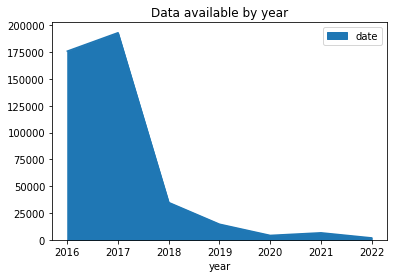

In [44]:
df_plot = df.groupby('year').agg({'date':'count'}).reset_index(drop=False)
fig = df_plot.plot(x='year', y='date', kind='area', title='Data available by year')

## Obtaining Latitude and Longitude

In [45]:
#example
data['locations'][0]

{'latitudeE7': -235822740,
 'longitudeE7': -466856661,
 'accuracy': 67,
 'activity': [{'activity': [{'type': 'STILL', 'confidence': 62},
    {'type': 'IN_VEHICLE', 'confidence': 31},
    {'type': 'ON_FOOT', 'confidence': 8},
    {'type': 'WALKING', 'confidence': 8}],
   'timestamp': '2016-06-21T21:02:53.977Z'}],
 'source': 'WIFI',
 'deviceTag': -1740635755,
 'timestamp': '2016-06-21T21:02:54.337Z'}

In [46]:
list_lat = []
list_long = []

for i in tqdm(data['locations']):
    list_lat.append(i['latitudeE7'])
    list_long.append(i['longitudeE7'])

#inserting latitude and longitude in dataframe
df['latitude'] = pd.Series(list_lat)
df['longitude'] = pd.Series(list_long)

100%|██████████| 430498/430498 [00:00<00:00, 3236864.39it/s]


In [47]:
#add '.' after second digit of both coordinates
df['lat_signal'] = np.where(df['latitude'] > 0, '+', '-')
df['long_signal'] = np.where(df['longitude'] > 0, '+', '-')

df['latitude'] = np.where(df['lat_signal'] == '-',\
                         df['latitude'].astype(str).str[:3] + '.' + df['latitude'].astype(str).str[3:],\
                         df['latitude'].astype(str).str[:2] + '.' + df['latitude'].astype(str).str[2:])

df['longitude'] = np.where(df['long_signal'] == '-',\
                          df['longitude'].astype(str).str[:3] + '.' + df['longitude'].astype(str).str[3:],\
                          df['longitude'].astype(str).str[:2] + '.' + df['longitude'].astype(str).str[2:])

df.head()

date  year     latitude    longitude lat_signal long_signal
0 2016-06-21 21:02:54  2016  -23.5822740  -46.6856661          -           -
1 2016-06-21 21:05:08  2016  -23.5853147  -46.6884743          -           -
2 2016-06-21 21:07:17  2016  -23.5850464  -46.6910407          -           -
3 2016-06-21 21:07:44  2016  -23.5845803  -46.6917750          -           -
4 2016-06-21 21:08:59  2016  -23.5864830  -46.6955541          -           -

## Saving Data in 'intermediate' folder

In [49]:
path_out = '../data/intermediate/data_intermediate.csv'
df[['date','year','latitude','longitude']].to_csv(path_out, sep=';', index=False)